In [77]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [78]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split

### 1. Завантажте датасет `data.csv` та візуалізуйте дані за допомогою діаграми розсіювання

На діаграмі розсіювання через велику кількість значень точки можуть "зливатись", тому можете використовувати атрибут методу `.scatter(..., s=0.5)`, який відповідає за маштабування точок на діаграмі.

      x           y
0  24.0  164.648356
1  50.0  242.393389
2  15.0  151.655969
3  38.0  209.759194
4  87.0  361.866952


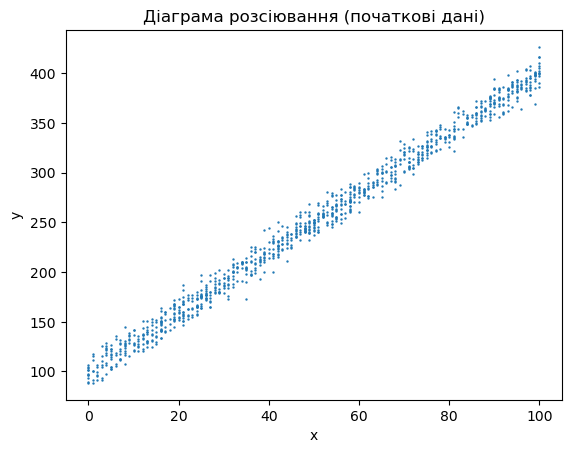

In [79]:
data = pd.read_csv('data.csv')
print(data.head())

plt.scatter(data['x'], data['y'], s=0.5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Діаграма розсіювання (початкові дані)')
plt.show()

### 2. Нормалізуйте значення $x$ та $y$ з датасету, використовуючи стандартизовану оцінку

[Стандартизована оцінка](https://uk.wikipedia.org/wiki/Стандартизована_оцінка) розраховується за наступною формулою: $ z = \frac{x - \mu}{\sigma} $, де $\mu$ - [середнє значення](https://uk.wikipedia.org/wiki/Середнє_значення) вибірки, а $\sigma$ - [стандартне відхилення](https://uk.wikipedia.org/wiki/Стандартне_відхилення).

Візуалізуйте нормалізовані дані.

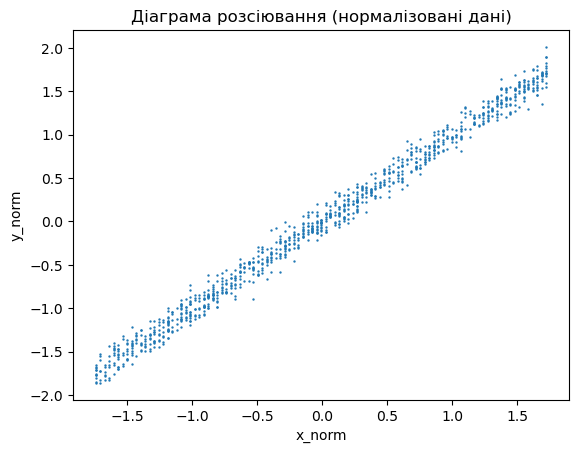

In [80]:
mu_x = data['x'].mean()
sigma_x = data['x'].std()

mu_y = data['y'].mean()
sigma_y = data['y'].std()

# Додаємо в датафрейм нові колонки з нормалізованими даними
data['x_norm'] = (data['x'] - mu_x) / sigma_x
data['y_norm'] = (data['y'] - mu_y) / sigma_y

# Візуалізуємо нормалізовані дані
plt.scatter(data['x_norm'], data['y_norm'], s=0.5)
plt.xlabel('x_norm')
plt.ylabel('y_norm')
plt.title('Діаграма розсіювання (нормалізовані дані)')
plt.show()

### 3. Розбийте датасет на вибірки для тренування та тестування

In [81]:
train_df, test_df = train_test_split(data, test_size=0.2, random_state=42)

print("Розмір тренувальної вибірки:", len(train_df))
print("Розмір тестової вибірки:", len(test_df))

# Витягнемо окремо значення X та y (нормалізовані) для тренування та для тесту
X_train = train_df['x_norm'].values
y_train = train_df['y_norm'].values

X_test = test_df['x_norm'].values
y_test = test_df['y_norm'].values

Розмір тренувальної вибірки: 799
Розмір тестової вибірки: 200


### 4. Реалізуйте алгоритм лінійної регресії, який використовує градієнтний спуск для мінімізації функції втрат

**Модель:** $ f_{\beta_{0},\beta_{1}}(x) = \beta_{0} + \beta_{1} * x $

**Функція витрат:** $J(\beta_{0},\beta_{1}) = \frac{1}{2m} \sum_{i=1}^{m}(f_{\beta_{0},\beta_{1}}(x^{(i)})-y^{(i)})^2 $

**Алгоритм градієнтного спуску:**

$\text{виконувати, доки } J(\beta_{0},\beta_{1}) \text{ не мінімізується \{}$

$\qquad\beta_{0} = \beta_{0} - \alpha \frac{\partial}{\partial\beta_{0}}J(\beta_{0},\beta_{1})$

$\qquad\beta_{1} = \beta_{1} - \alpha \frac{\partial}{\partial\beta_{1}}J(\beta_{0},\beta_{1})$

$\text{\}}$

**Де похідні:**

$\frac{\partial}{\partial\beta_{0}}J(\beta_{0},\beta_{1}) = \frac{1}{m}\sum_{i=1}^{m}(f_{\beta_{0},\beta_{1}}(x^{(i)})-y^{(i)}) $

$\frac{\partial}{\partial\beta_{1}}J(\beta_{0},\beta_{1}) = \frac{1}{m}\sum_{i=1}^{m}(f_{\beta_{0},\beta_{1}}(x^{(i)})-y^{(i)})*x^{(i)} $

У метод градієнтного спуску додайте зберігання значення функції витрат для кожного його кроку.

Для більш детального ознайомлення із алгоритмом лінійної регресії та градієнтного спуску можете звернутись до відео `#9` - `#20` зі [списку відтворення на YouTube каналу deeplearning.ai](https://www.youtube.com/playlist?list=PLkDaE6sCZn6FNC6YRfRQc_FbeQrF8BwGI). Тема лінійної регресії розкривається у відео `#9` - `#14`, а градієнтного спуску у відео `#15` - `#20`.

In [82]:
def gradient_descent(X, y, alpha=0.01, n_iterations=1000):
    m = len(X)

    beta0 = 0.0
    beta1 = 0.0

    # Масив для збереження значення функції витрат на кожному кроці
    cost_history = []

    for _ in range(n_iterations):
        y_pred = beta0 + beta1 * X
        
        errors = (y_pred - y)
        
        # Обчислення похідних (градієнтів)
        dBeta0 = (1/m) * np.sum(errors)
        dBeta1 = (1/m) * np.sum(errors * X)
        
        beta0 = beta0 - alpha * dBeta0
        beta1 = beta1 - alpha * dBeta1
        
        # Обчислимо поточну функцію втрат (cost)
        cost = (1/(2*m)) * np.sum(errors**2)
        cost_history.append(cost)

    return beta0, beta1, cost_history

alpha = 0.01        # learning rate
n_iterations = 500  # iteration coint

beta0_gd, beta1_gd, cost_history = gradient_descent(X_train, y_train, alpha, n_iterations)

print("Отримані параметри (нормалізовані):")
print(f"beta0 = {beta0_gd}")
print(f"beta1 = {beta1_gd}")

Отримані параметри (нормалізовані):
beta0 = -0.00223449305828795
beta1 = 0.9909484378198367


### 5. Візуалізуйте мінімізацію функції витрат $J(\beta_{0},\beta_{1})$

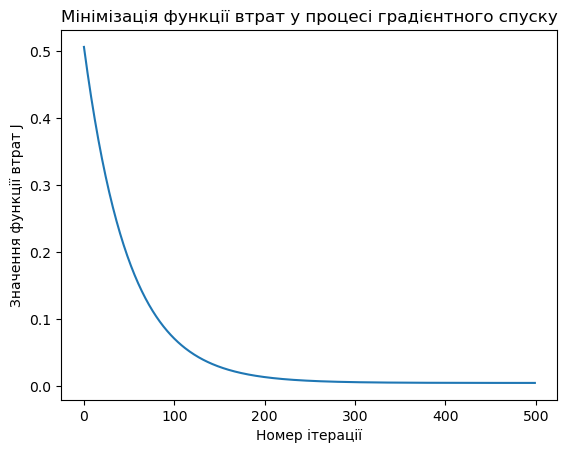

In [83]:
plt.plot(cost_history)
plt.xlabel('Номер ітерації')
plt.ylabel('Значення функції втрат J')
plt.title('Мінімізація функції втрат у процесі градієнтного спуску')
plt.show()

### 6. Візуалізуйте дані з датасету та пряму регресії на одній діаграмі

Для відображення даних з датасетів тренування та тестування використовуйте різні кольори.

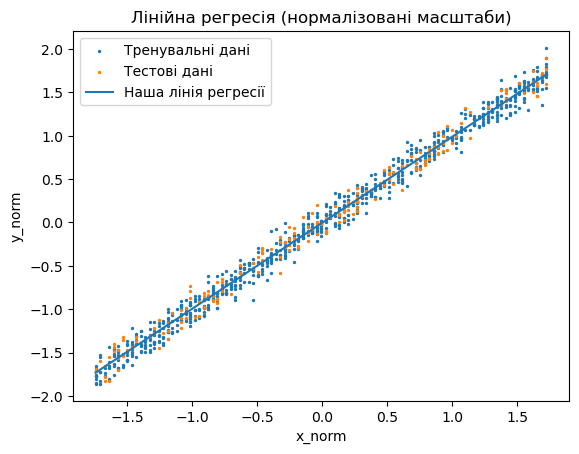

In [84]:
# Передбачення на "сітці" x для побудови лінії
x_line = np.linspace(min(X_train.min(), X_test.min()),
                     max(X_train.max(), X_test.max()), 100)
y_line = beta0_gd + beta1_gd * x_line

plt.scatter(X_train, y_train, s=2, label='Тренувальні дані')
plt.scatter(X_test,  y_test,  s=2, label='Тестові дані')
plt.plot(x_line, y_line, label='Наша лінія регресії')
plt.xlabel('x_norm')
plt.ylabel('y_norm')
plt.title('Лінійна регресія (нормалізовані масштаби)')
plt.legend()
plt.show()

### 7. Скористайтесь алгоритмом стохастичного градієнтного спуску з бібліотеки `sklearn` для отримання аналогічних параметів

Тепер за допомогою класу `SGDRegressor` з бібліотеки `sklearn` побудуйте аналогічну модель. Для тренування використовуйте ті самі дані, які ми використовували для алгоритму лінійної регресії.

Відобразіть датасет та пряму регресії з отриманої моделі.

Отримані параметри (нормалізовані) з SGDRegressor:
beta0 = -0.001855325709317595
beta1 = 0.9866978588649061


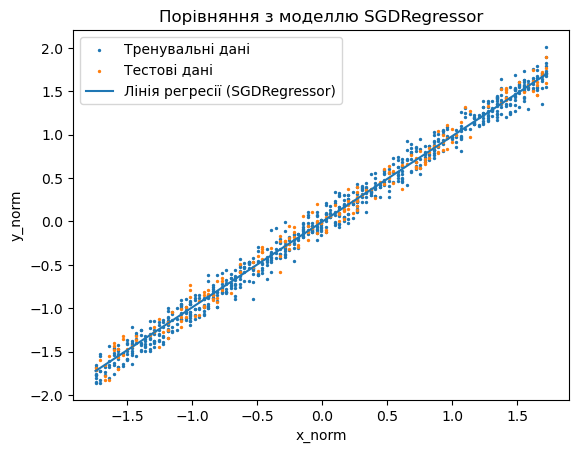

In [85]:
X_train_2d = X_train.reshape(-1, 1)
X_test_2d = X_test.reshape(-1, 1)

sgd_model = SGDRegressor(alpha=0.01, max_iter=500, random_state=42)
sgd_model.fit(X_train_2d, y_train)

print("Отримані параметри (нормалізовані) з SGDRegressor:")
print(f"beta0 = {sgd_model.intercept_[0]}")     #  β0
print(f"beta1 = {sgd_model.coef_[0]}")          #  β1

y_line_sgd = sgd_model.intercept_[0] + sgd_model.coef_[0] * x_line

plt.scatter(X_train, y_train, s=2, label='Тренувальні дані')
plt.scatter(X_test, y_test, s=2, label='Тестові дані')
plt.plot(x_line, y_line_sgd, label='Лінія регресії (SGDRegressor)')
plt.xlabel('x_norm')
plt.ylabel('y_norm')
plt.title('Порівняння з моделлю SGDRegressor')
plt.legend()
plt.show()

### 8. Порівняйте значення $\beta_0$ та $\beta_1$ які Ви отримали в результаті роботи Вашого алгоритму, та алгоритму з бібліотеки `sklearn`

In [86]:
print("=== Порівняння параметрів β0 та β1 ===")
print(f"Наша модель ():         beta0 = {beta0_gd:.5f}, beta1 = {beta1_gd:.5f}")
print(f"SGDRegressor модель: beta0 = {sgd_model.intercept_[0]:.5f}, beta1 = {sgd_model.coef_[0]:.5f}")

=== Порівняння параметрів β0 та β1 ===
Наша модель ():         beta0 = -0.00223, beta1 = 0.99095
SGDRegressor модель: beta0 = -0.00186, beta1 = 0.98670


### 9. Зробіть порівняння метрик $R^2$ та `MAE` для Вашого алгоритму та для алгоритму з бібліотеки `sklearn`

Для підрахунку метрик $R^2$ та `MAE` скористайтесь вибіркою з датасету _для тестування_.

$R^2$ - [коефіцієнт детермінації](https://uk.wikipedia.org/wiki/Коефіцієнт_детермінації), метод [`r2_score`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html) з бібліотки `sklearn`.

`MAE` - [середня абсолютна похибка](https://en.wikipedia.org/wiki/Mean_absolute_error), метод [`mean_absolute_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html) з бібліотки `sklearn`.

In [87]:
y_pred_test_ours = beta0_gd + beta1_gd * X_test

y_pred_test_sgd = sgd_model.predict(X_test_2d)

r2_ours = r2_score(y_test, y_pred_test_ours)
mae_ours = mean_absolute_error(y_test, y_pred_test_ours)

r2_sgd = r2_score(y_test, y_pred_test_sgd)
mae_sgd = mean_absolute_error(y_test, y_pred_test_sgd)

print("=== Оцінка на тестових даних ===")
print(f"Наша модель   -> R^2: {r2_ours:.5f},  MAE: {mae_ours:.5f}")
print(f"SGDRegressor -> R^2: {r2_sgd:.5f}, MAE: {mae_sgd:.5f}")

=== Оцінка на тестових даних ===
Наша модель   -> R^2: 0.98887,  MAE: 0.08234
SGDRegressor -> R^2: 0.98891, MAE: 0.08211


In [94]:
arg = [[0.55]]
print(sgd_model.predict(arg))

res = beta0_gd + beta1_gd * 0.55
print(res)

[0.5408285]
0.5427871477426223
